## Importing the relevant libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set()

## Loading the data

In [2]:
df = pd.read_csv('iris_dataset.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploring and visualising the data

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


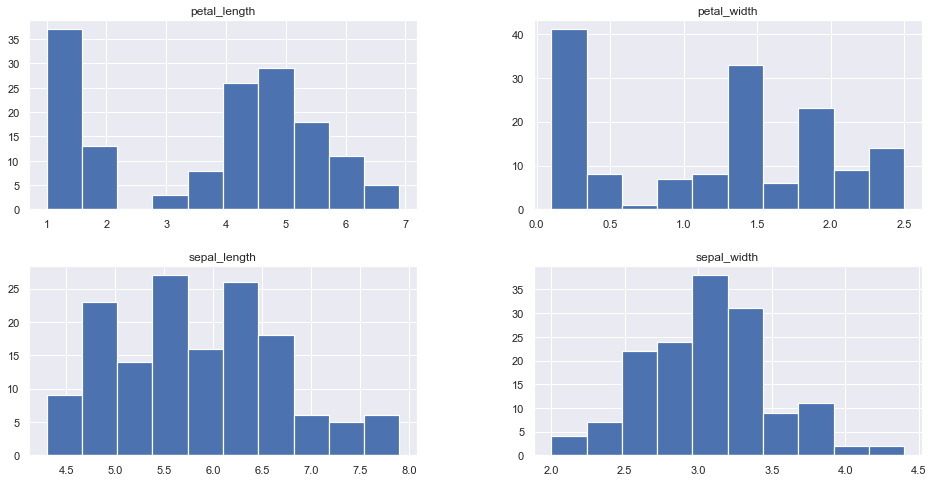

In [7]:
# histograms

df.hist(linewidth=1.2)
figure=plt.gcf()
figure.set_size_inches(16,8)
plt.show()

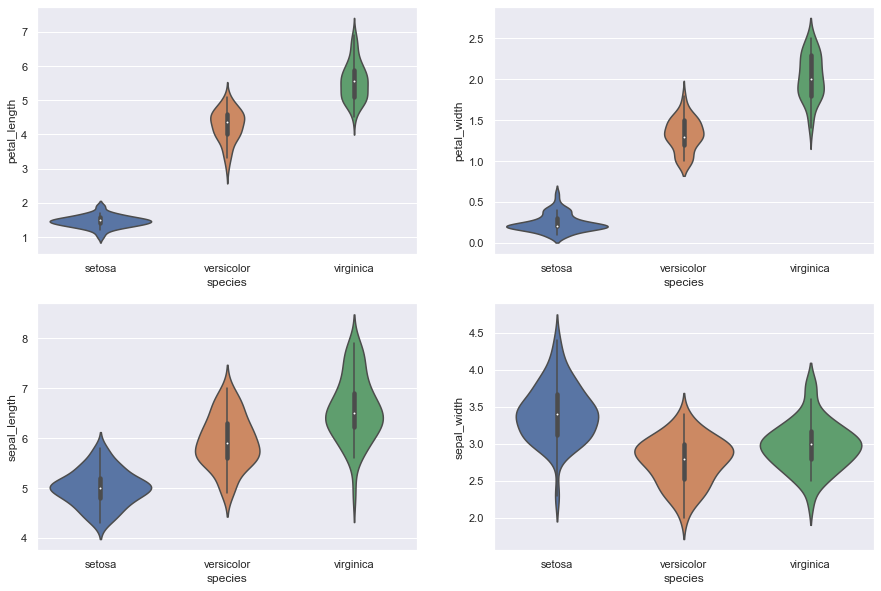

In [8]:
# violin plot

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

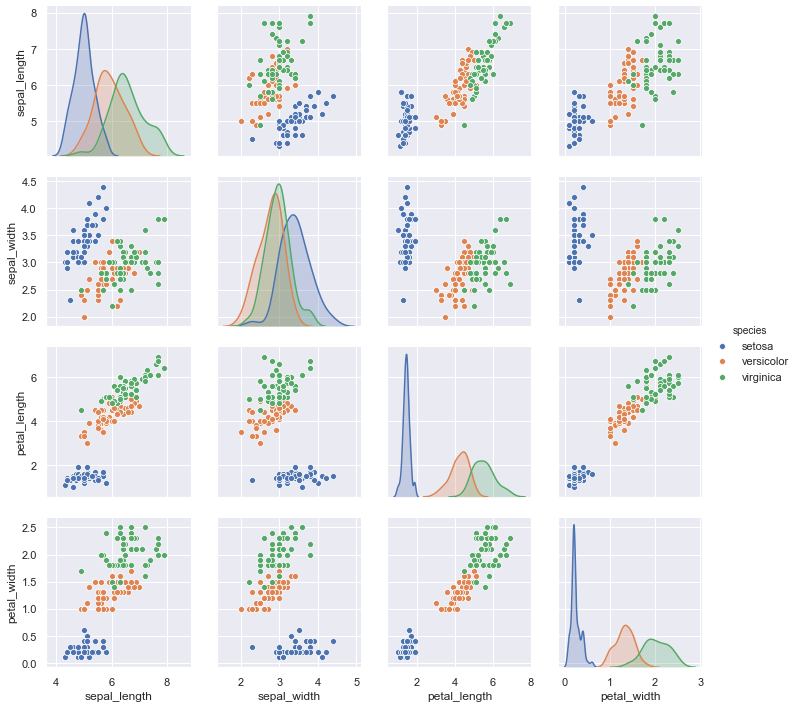

In [9]:
# scatter plots

sns.pairplot(df, hue='species')

## Encoding 'species' column

In [10]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [11]:
encode = LabelEncoder()
df.species = encode.fit_transform(df.species)

In [12]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Splitting the data

In [13]:
# seperate the target and independent variable

x = df.drop('species', axis=1)
y = df['species']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic regression

In [15]:
reg = LogisticRegression()

In [16]:
reg.fit(x_train, y_train)

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
round(reg.score(x_train, y_train), 2)

0.96

In [18]:
predict = reg.predict(x_test)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Evaluating the model

In [21]:
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

# accuracy score
print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score on test data : 


1.0
